# Index

- [1 Introduction](#1)
- [2 Title](#2)
- [3 Title](#3)
- [4 Title](#4)
- [5 Title](#5)
- [6 Title](#6)
- [7 Title](#7)
- [8 Title](#8)
- [9 Title](#9)
- [10 Title](#10)
- [11 Title](#11)
- [12 Title](#12)
- [13 Title](#13)
- [14 Title](#14)
- [15 Next Steps](#15)
- [16 Conclusions](#21)

# 1

## Introduction

instructions



[Index](#Index)

# 2

## Title

In [341]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.neighbors as skneighbors
import sklearn.metrics as skmetrics
import sklearn.model_selection as skmodelselection
from prettytable import PrettyTable

In [342]:
col_names = ["symboling","normalized_losses","make","fuel_type","aspiration","num_doors","body_style",
             "drive_wheels","engine_location","wheel_base","length","width","height","curb_weight","engine_type",
             "num_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio","horsepower",
             "peak_rpm","city_mpg","highway_mpg","price"]
cars = pd.read_csv("imports-85.data", names=col_names)
cars

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [343]:
cars["make"].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

In [344]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [345]:
cars=cars.replace('?',np.nan)
cars

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [346]:
cars[["normalized_losses","curb_weight","bore","stroke","horsepower","peak_rpm","price"]]=cars[["normalized_losses","curb_weight",
                                                                                                "bore","stroke","horsepower",
                                                                                                "peak_rpm","price"]].astype("float")

In [347]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    float64
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

Instrusctions


In [348]:
cars.drop(columns=["normalized_losses"],inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel_type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num_doors          203 non-null    object 
 5   body_style         205 non-null    object 
 6   drive_wheels       205 non-null    object 
 7   engine_location    205 non-null    object 
 8   wheel_base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb_weight        205 non-null    float64
 13  engine_type        205 non-null    object 
 14  num_cylinders      205 non-null    object 
 15  engine_size        205 non-null    int64  
 16  fuel_system        205 non

In [349]:
cars[cars['price'].isnull()]

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [350]:
cars[cars['bore'].isnull()]

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [351]:
cars[cars['horsepower'].isnull()]

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [352]:
cars.dropna(inplace=True)

In [353]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_doors          193 non-null    object 
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    float64
 13  engine_type        193 non-null    object 
 14  num_cylinders      193 non-null    object 
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [354]:
cars["make"].value_counts()

toyota           32
nissan           18
honda            13
mitsubishi       13
volkswagen       12
mazda            12
subaru           12
peugot           11
volvo            11
bmw               8
dodge             8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64

In [355]:
cars_analysis = cars.copy()
cars_analysis

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [356]:
cars_analysis.select_dtypes(include='number').columns

Index(['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [357]:
#MAY NEED THIS LATER - NEED TO CHECK

# cars_analysis.select_dtypes(include='number')

# fig = plt.figure(figsize=(10,7))
# ax = fig.add_subplot(111)
# cars_analysis.select_dtypes(include='number').iloc[:,:-2].boxplot()
# ax.tick_params(labelrotation=90)
# plt.show()

[Index](#Index)

# 3

## Title

In [358]:
no_price_column = [each_column for each_column in cars.columns if each_column!='price']

instructions


In [359]:
cars['symboling'] = cars['symboling'].astype('str')
ord_cols=['symboling','make', 'fuel_type', 'aspiration', 'num_doors',
          'body_style', 'drive_wheels', 'engine_location', 
          'engine_type', 'num_cylinders', 'fuel_system']

In [360]:
num_cols=['wheel_base', 'length',
          'width', 'height', 'curb_weight', 'engine_size', 
          'bore', 'stroke', 'compression_ratio',
          'horsepower', 'peak_rpm', 'city_mpg', 
          'highway_mpg','price']

In [361]:
#MAY NEED THIS LATER - NEED TO CHECK

# fig = plt.figure(figsize=(10,7))
# ax = fig.add_subplot(111)
# cars[num_cols].iloc[:,:-1].boxplot()
# ax.tick_params(labelrotation=90)
# plt.show()

In [362]:
for each_col in ord_cols:
    print(cars_analysis[each_col].value_counts())
    print('\n')

 0    63
 1    51
 2    31
 3    23
-1    22
-2     3
Name: symboling, dtype: int64


toyota           32
nissan           18
honda            13
mitsubishi       13
volkswagen       12
mazda            12
subaru           12
peugot           11
volvo            11
bmw               8
dodge             8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64


gas       174
diesel     19
Name: fuel_type, dtype: int64


std      158
turbo     35
Name: aspiration, dtype: int64


four    112
two      81
Name: num_doors, dtype: int64


sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64


fwd    114
rwd     71
4wd      8
Name: drive_wheels, dtype: int64


front    190
rear       3
Name: engine_location, dtype: int64


ohc     141
ohcf     15
ohcv     13
d

In [363]:
#removes columns to prevent collinearity
#dummy_df.drop(columns=['engine_location_rear','num_doors_two','aspiration_std','fuel_type_diesel'],inplace=True)

In [364]:
correlations=cars.corr()
most_corr_features = correlations[(correlations['price'].between(-1,-0.5)) | (correlations['price'].between(0.5,1))]['price']
most_corr_features.index

Index(['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore',
       'horsepower', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

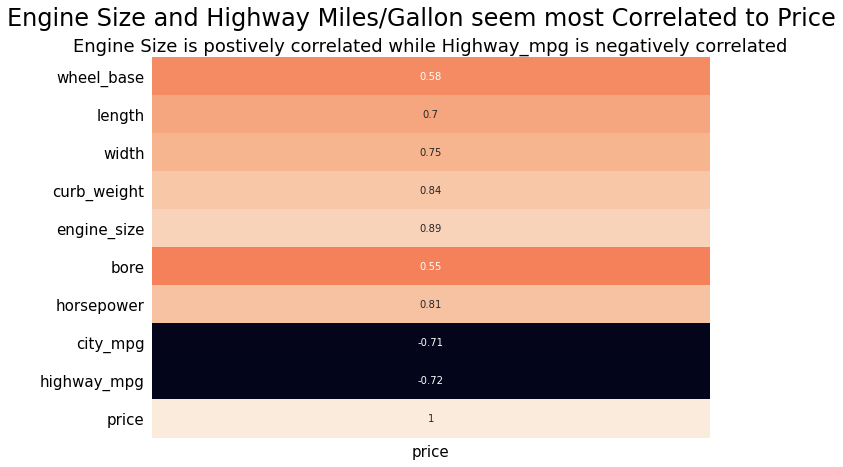

In [365]:
correlation = cars[most_corr_features.index].corr()
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.heatmap(correlation.loc[:,"price":"price"],annot=True,cbar=False)
ax.tick_params(axis='y',left=False,rotation=0,labelsize=15)
ax.tick_params(axis='x',bottom=False,rotation=0,labelsize=15)
ax.set_title("Engine Size is postively correlated while Highway_mpg is negatively correlated",size=18)
plt.suptitle("Engine Size and Highway Miles/Gallon seem most Correlated to Price",size=24)
plt.show()

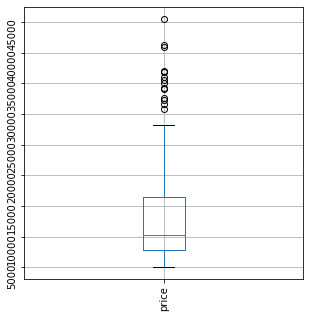

In [366]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
cars_analysis[["price"]].boxplot()
ax.tick_params(labelrotation=90)
plt.show()

In [367]:
cars_analysis['price'].describe()

count      193.000000
mean     13285.025907
std       8089.082886
min       5118.000000
25%       7738.000000
50%      10245.000000
75%      16515.000000
max      45400.000000
Name: price, dtype: float64

In [368]:
cars_analysis[cars_analysis['price']>30000][["make","price"]]

,make,price
15,bmw,30760.0
16,bmw,41315.0
17,bmw,36880.0
47,jaguar,32250.0
48,jaguar,35550.0
49,jaguar,36000.0
70,mercedes-benz,31600.0
71,mercedes-benz,34184.0
72,mercedes-benz,35056.0
73,mercedes-benz,40960.0


In [369]:
cars_analysis=cars_analysis[cars_analysis['price']<30000]

In [370]:
cars=cars[cars['price']<30000]

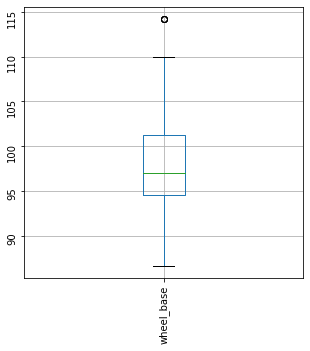

109    114.2
114    114.2
113    114.2
110    114.2
67     110.0
       ...  
0       88.6
1       88.6
18      88.4
31      86.6
30      86.6
Name: wheel_base, Length: 179, dtype: float64

In [371]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
cars_analysis[["wheel_base"]].boxplot()
ax.tick_params(labelrotation=90)
plt.show()
cars_analysis['wheel_base'].sort_values(ascending=False)

In [372]:
cars_analysis['wheel_base'].describe()

count    179.000000
mean      98.425140
std        5.389772
min       86.600000
25%       94.500000
50%       97.000000
75%      101.200000
max      114.200000
Name: wheel_base, dtype: float64

In [373]:
cars_analysis[cars_analysis["wheel_base"]>110][["make","wheel_base","price"]]

,make,wheel_base,price
109,peugot,114.2,12440.0
110,peugot,114.2,13860.0
113,peugot,114.2,16695.0
114,peugot,114.2,17075.0


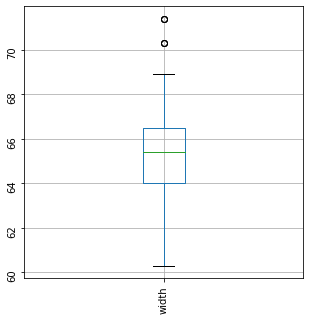

6      71.4
8      71.4
7      71.4
68     70.3
69     70.3
       ... 
19     63.6
138    63.4
40     62.5
43     61.8
18     60.3
Name: width, Length: 179, dtype: float64

In [374]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
cars_analysis[["width"]].boxplot()
ax.tick_params(labelrotation=90)
plt.show()
cars_analysis['width'].sort_values(ascending=False)

In [375]:
cars_analysis['width'].describe()

count    179.000000
mean      65.639106
std        1.872489
min       60.300000
25%       64.000000
50%       65.400000
75%       66.500000
max       71.400000
Name: width, dtype: float64

In [376]:
cars_analysis[cars_analysis["width"]>69][["make","width"]]

,make,width
6,audi,71.4
7,audi,71.4
8,audi,71.4
67,mercedes-benz,70.3
68,mercedes-benz,70.3
69,mercedes-benz,70.3


In [377]:
cars_analysis=cars_analysis[cars_analysis["width"]<69]
cars=cars[cars["width"]<69]

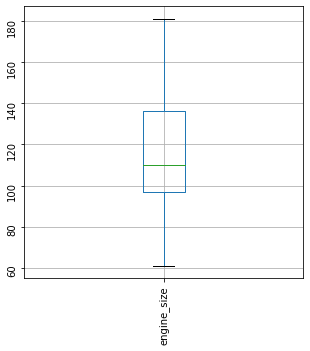

105    181
101    181
102    181
103    181
104    181
      ... 
118     90
120     90
26      90
32      79
18      61
Name: engine_size, Length: 173, dtype: int64

In [378]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
cars_analysis[["engine_size"]].boxplot()
ax.tick_params(labelrotation=90)
plt.show()
cars_analysis['engine_size'].sort_values(ascending=False)

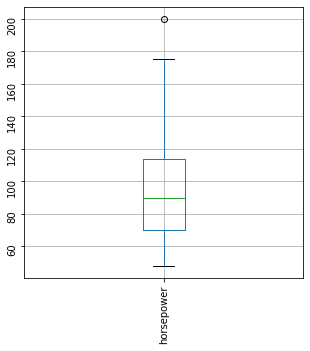

105    200.0
75     175.0
198    162.0
199    162.0
178    161.0
       ...  
159     56.0
90      55.0
182     52.0
184     52.0
18      48.0
Name: horsepower, Length: 173, dtype: float64

In [379]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
cars_analysis[["horsepower"]].boxplot()
ax.tick_params(labelrotation=90)
plt.show()

cars_analysis['horsepower'].sort_values(ascending=False)

In [380]:
cars_analysis['horsepower'].describe()

count    173.000000
mean      96.306358
std       30.523796
min       48.000000
25%       70.000000
50%       90.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

In [381]:
cars_analysis[cars_analysis["horsepower"]>199][["make","horsepower"]]

,make,horsepower
105,nissan,200.0


In [382]:
cars_analysis=cars_analysis[cars_analysis["horsepower"]<199]
cars=cars[cars["horsepower"]<199]

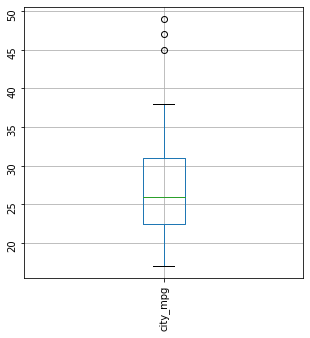

30     49
18     47
90     45
19     38
20     38
       ..
202    18
102    17
198    17
199    17
101    17
Name: city_mpg, Length: 172, dtype: int64

In [383]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
cars_analysis[["city_mpg"]].boxplot()
ax.tick_params(labelrotation=90)
plt.show()

cars_analysis['city_mpg'].sort_values(ascending=False)

In [384]:
cars_analysis['city_mpg'].describe()

count    172.000000
mean      26.319767
std        5.981166
min       17.000000
25%       22.500000
50%       26.000000
75%       31.000000
max       49.000000
Name: city_mpg, dtype: float64

In [385]:
cars_analysis[cars_analysis["city_mpg"]>45][["make","city_mpg"]]

,make,city_mpg
18,chevrolet,47
30,honda,49


In [386]:
cars_analysis=cars_analysis[cars_analysis["city_mpg"]<45]
cars=cars[cars["city_mpg"]<45]

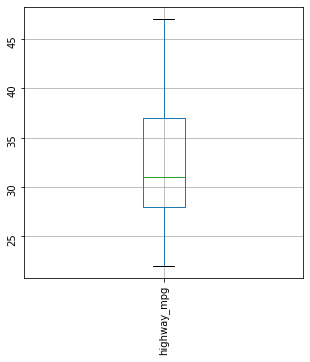

160    47
159    47
184    46
182    46
20     43
       ..
102    22
101    22
198    22
199    22
4      22
Name: highway_mpg, Length: 169, dtype: int64

In [387]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
cars_analysis[["highway_mpg"]].boxplot()
ax.tick_params(labelrotation=90)
plt.show()
cars_analysis['highway_mpg'].sort_values(ascending=False)

In [388]:
cars_analysis['highway_mpg'].describe()

count    169.000000
mean      31.538462
std        5.692518
min       22.000000
25%       28.000000
50%       31.000000
75%       37.000000
max       47.000000
Name: highway_mpg, dtype: float64

In [389]:
cars_analysis[cars_analysis["highway_mpg"]>50][["make","highway_mpg"]]

,make,highway_mpg


In [390]:
cars_analysis=cars_analysis[cars_analysis["highway_mpg"]<50]
cars=cars[cars["highway_mpg"]<50]

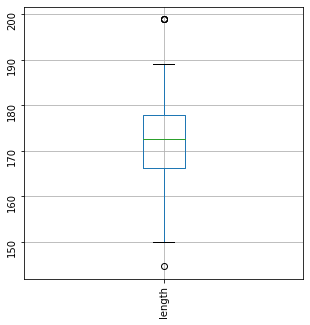

114    198.9
109    198.9
113    198.9
110    198.9
14     189.0
       ...  
19     155.9
34     150.0
33     150.0
32     150.0
31     144.6
Name: length, Length: 169, dtype: float64

In [391]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
cars_analysis[["length"]].boxplot()
ax.tick_params(labelrotation=90)
plt.show()
cars_analysis['length'].sort_values(ascending=False)

In [392]:
cars_analysis[(cars_analysis["length"]<150) | (cars_analysis["length"]>190)][["make","length"]]

,make,length
31,honda,144.6
109,peugot,198.9
110,peugot,198.9
113,peugot,198.9
114,peugot,198.9


In [393]:
cars_analysis=cars_analysis[cars_analysis["length"].between(149,190)]

In [394]:
cars=cars[cars["length"].between(149,190)]

In [395]:
cars_analysis['make'].value_counts()

toyota         32
nissan         16
mitsubishi     13
subaru         12
mazda          12
volkswagen     12
volvo          11
honda          11
dodge           8
peugot          7
plymouth        7
saab            6
bmw             5
audi            3
alfa-romero     3
chevrolet       2
isuzu           2
mercury         1
porsche         1
Name: make, dtype: int64

In [396]:
##Required DO NOT DELETE
not_price=[each_col for each_col in most_corr_features.index if each_col!='price']

In [397]:
not_price

['wheel_base',
 'length',
 'width',
 'curb_weight',
 'engine_size',
 'bore',
 'horsepower',
 'city_mpg',
 'highway_mpg']

In [398]:
num_cols

['wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [399]:
cars[not_price]=(cars[not_price]-cars[not_price].min())/(cars[not_price].max()-cars[not_price].min())
cars.drop(columns=ord_cols,inplace=True)
#cars=pd.concat([cars,dummy_df],axis=1)
cars

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.000000,0.482051,0.323944,48.8,0.487320,0.500000,0.664286,2.68,9.0,0.479675,5000.0,0.190476,0.20,13495.0
1,0.000000,0.482051,0.323944,48.8,0.487320,0.500000,0.664286,2.68,9.0,0.479675,5000.0,0.190476,0.20,16500.0
2,0.287805,0.543590,0.521127,52.4,0.675805,0.715686,0.100000,3.47,9.0,0.829268,5000.0,0.095238,0.16,16500.0
3,0.546341,0.682051,0.619718,54.3,0.342700,0.294118,0.464286,3.40,10.0,0.406504,5500.0,0.333333,0.32,13950.0
4,0.526829,0.682051,0.647887,54.3,0.676491,0.558824,0.464286,3.40,8.0,0.512195,5500.0,0.047619,0.00,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.000000,0.994872,1.000000,55.5,0.764222,0.607843,0.885714,3.15,9.5,0.504065,5400.0,0.285714,0.24,16845.0
201,1.000000,0.994872,0.985915,55.5,0.830706,0.607843,0.885714,3.15,8.7,0.878049,5300.0,0.095238,0.12,19045.0
202,1.000000,0.994872,1.000000,55.5,0.805346,0.921569,0.742857,2.87,8.8,0.666667,5500.0,0.047619,0.04,21485.0
203,1.000000,0.994872,1.000000,55.5,0.945853,0.647059,0.335714,3.40,23.0,0.439024,4800.0,0.428571,0.20,22470.0


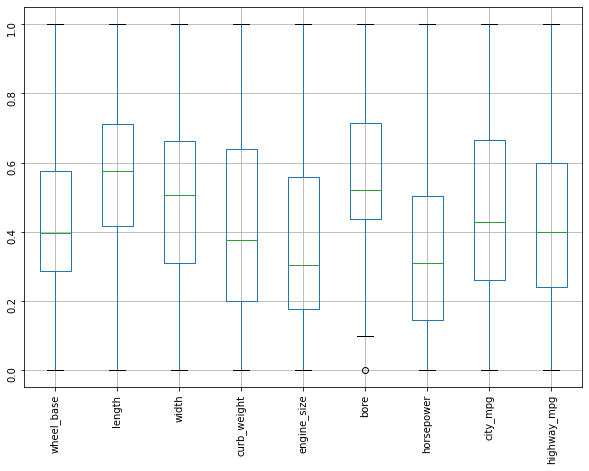

In [400]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
cars[not_price].boxplot()
ax.tick_params(labelrotation=90)
plt.show()

In [401]:
cars_analysis[not_price].describe()

,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,city_mpg,highway_mpg
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,97.986585,172.350610,65.432317,2450.012195,118.225610,3.305549,96.597561,26.018293,31.670732
std,4.429385,9.898227,1.524481,399.872280,24.869556,0.264450,29.677349,5.357722,5.648291
min,88.600000,150.000000,61.800000,1837.000000,79.000000,2.540000,52.000000,17.000000,22.000000
25%,94.500000,166.300000,64.000000,2126.500000,97.000000,3.150000,70.000000,22.500000,28.000000
50%,96.700000,172.400000,65.400000,2385.000000,110.000000,3.270000,90.000000,26.000000,32.000000
75%,100.400000,177.800000,66.500000,2768.250000,136.000000,3.540000,114.000000,31.000000,37.000000
max,109.100000,189.000000,68.900000,3296.000000,181.000000,3.940000,175.000000,38.000000,47.000000


In [402]:
cars[not_price].describe()

,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,city_mpg,highway_mpg
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.457882,0.573093,0.511594,0.420159,0.384565,0.546821,0.362582,0.429443,0.386829
std,0.216068,0.253801,0.214716,0.274073,0.243819,0.188893,0.241279,0.255130,0.225932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.287805,0.417949,0.309859,0.198424,0.176471,0.435714,0.146341,0.261905,0.240000
50%,0.395122,0.574359,0.507042,0.375600,0.303922,0.521429,0.308943,0.428571,0.400000
75%,0.575610,0.712821,0.661972,0.638280,0.558824,0.714286,0.504065,0.666667,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[Index](#Index)

# 4

## Title

In [403]:
cars.columns

Index(['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size',
       'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [404]:
#univariate
def knn_train_test(feature_col,target_col,data,n=10):
#     shuffle_index = np.random.permutation(data.index)
#     data = data.reindex(shuffle_index)
#     train_data = data.iloc[:int(len(data)*.8)]
#     test_data = data.iloc[int(len(data)*.8):]
    feature_train,feature_test,target_train,target_test=skmodelselection.train_test_split(data[[feature_col]],
                                                                    data[target_col],
                                                                    test_size=0.2,random_state=1)
    knn = skneighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(feature_train,target_train)
    predictions = knn.predict(feature_test)
    mse = skmetrics.mean_squared_error(target_test,predictions)
    rmse = mse**0.5
    return round(rmse,2)

In [405]:
#accuracy
def knn_train_test_accuracy(feature_col,target_col,data,n=10):
#     shuffle_index = np.random.permutation(data.index)
#     data = data.reindex(shuffle_index)
#     train_data = data.iloc[:int(len(data)*.8)]
#     test_data = data.iloc[int(len(data)*.8):]
    feature_train,feature_test,target_train,target_test=skmodelselection.train_test_split(data[[feature_col]],
                                                                    data[target_col],
                                                                    test_size=0.2,random_state=1)
    knn = skneighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(feature_train,target_train)
    predictions = knn.predict(feature_test)
    mse = skmetrics.mean_squared_error(target_test,predictions)
    rmse = mse**0.5
    return knn.score(feature_test,target_test)

In [406]:
parameter=[5,10,15,20]
univariate_param_result=pd.DataFrame(columns=["rmse"]+not_price)
for each_parameter in parameter:
    parameter_results=[]
    parameter_results.append(each_parameter)
    for each_col in not_price:
        rmse=knn_train_test(each_col,"price",cars,each_parameter)
        parameter_results.append(rmse)
    pos=len(univariate_param_result)
    univariate_param_result.loc[pos]=parameter_results
univariate_param_result

,rmse,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,city_mpg,highway_mpg
0,5.0,2930.38,2648.91,2596.61,2427.07,2968.16,4234.86,3062.70,2930.75,2367.68
1,10.0,3010.73,2973.30,2771.56,2171.35,2806.45,4207.64,3034.25,3053.39,2123.47
2,15.0,3245.49,2831.32,2804.61,2052.42,2846.53,4288.98,2802.69,3042.21,2170.58
3,20.0,3285.80,2655.66,2989.22,2039.56,2816.14,4233.43,2771.40,3113.75,2175.29


In [407]:
#FOR ACCURACY

# parameter=[5,10,15,20]
# univariate_param_result=pd.DataFrame(columns=["rmse"]+not_price)
# for each_parameter in parameter:
#     parameter_results=[]
#     parameter_results.append(each_parameter)
#     for each_col in not_price:
#         rmse=knn_train_test_accuracy(each_col,"price",cars,each_parameter)
#         parameter_results.append(rmse)
#     pos=len(univariate_param_result)
#     univariate_param_result.loc[pos]=parameter_results
# univariate_param_result

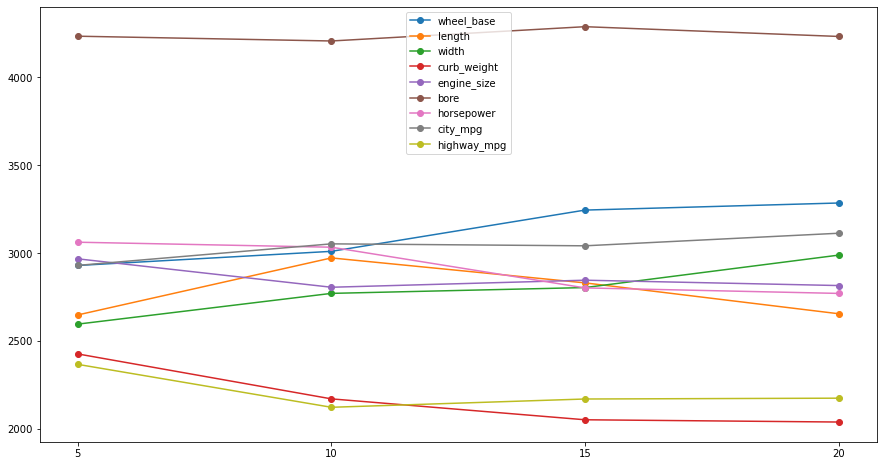

In [408]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111)
#univariate_param_result["rmse"]
ax.plot(list(range(5,25,5)),univariate_param_result[not_price],marker='o')
ax.set_xticks([5,10,15,20])
ax.legend(not_price)
plt.show()

In [409]:
# fig=plt.figure(figsize=(15,8))
# ax=fig.add_subplot(111)
# #univariate_param_result["rmse"]
# ax.plot(list(range(5,25,5)),univariate_param_result[not_price],marker='o')
# ax.set_xticks([5,10,15,20])
# ax.legend(not_price)
# plt.show()

In [410]:
rmse_mean=univariate_param_result.mean(axis=0).sort_values(ascending=False)[:-1]

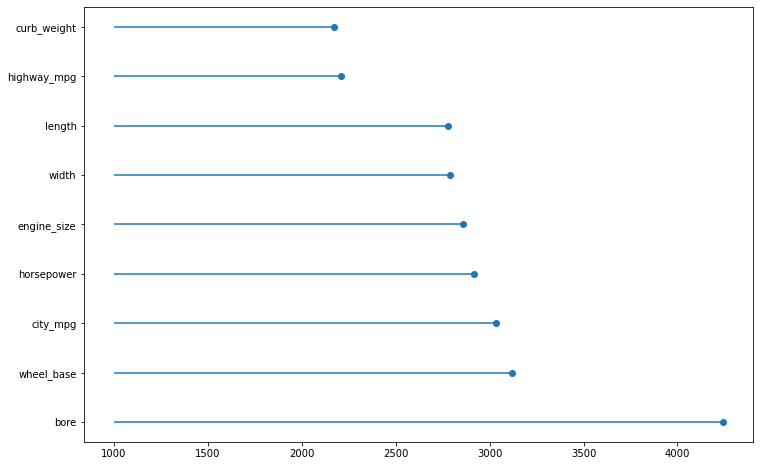

In [411]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.hlines(y=rmse_mean.index,xmin=1000,xmax=rmse_mean)
ax.scatter(y=rmse_mean.index,x=rmse_mean)

# for i in range(len(rmse_mean)):
#     ax.text(s=rmse_mean[i],x=rmse_mean[i],y=rmse_mean.index(rmse_mean[i]))
#     print(x,y)
plt.show()

---

---

In [412]:
# fig=plt.figure(figsize=(12,8))
# #ax=fig.add_subplot(111)
# univariate_param_result.set_index("col_name").plot()
# plt.show()

In [413]:
# fig=plt.figure(figsize=(12,8))
# ax=fig.add_subplot(111)
# #ax.hlines(y=sorted_rmse["col_name"],xmin=1000,xmax=sorted_rmse["rmse"])
# for each_col in univariate_param_result.columns[1:]:
#     ax.plot(list(range(5,25,5)),univariate_param_result[each_col])
# plt.show()

In [414]:
# parameter=[5,10,15,20]
# univariate_param_result=pd.DataFrame(columns=["col_name",'rmse_5','rmse_10','rmse_15','rmse_20'])
# for each_parameter in parameter:
#     for each_col in most_corr_features.index:
#         if each_col!="price":

In [415]:
# knn_train_test("wheel_base","price",cars)

In [416]:
# knn_train_test("length","price",cars)

In [417]:
# type(most_corr_features.index)

In [418]:
# col_name=pd.Series(most_corr_features.index)

In [419]:
# t=PrettyTable(["Column Name","MSE","RMSE"])
# rmses=[]
# col_name=[]
# for each_col in most_corr_features.index:
#     if each_col!="price":
#         mse,rmse=knn_train_test(each_col,"price",cars)
#         col_name.append(each_col)
#         rmses.append(rmse)
#         t.add_row([each_col,mse,rmse])

# mse_values=pd.DataFrame(pd.Series(col_name),columns=['col_name'])
# mse_values["rmse"] = pd.Series(rmses)
# print(t)

In [420]:
#sorted_rmse=mse_values.sort_values("rmse",ascending=False)

In [421]:
#sorted_rmse.reset_index(drop=True,inplace=True)

In [422]:
#sorted_rmse

In [423]:
# fig=plt.figure(figsize=(12,8))
# ax=fig.add_subplot(111)
# ax.hlines(y=sorted_rmse["col_name"],xmin=1000,xmax=sorted_rmse["rmse"])
# ax.scatter(y=sorted_rmse["col_name"],x=sorted_rmse["rmse"])

# for i in range(len(sorted_rmse)):
#     ax.text(s=sorted_rmse.iloc[i,1],x=sorted_rmse.iloc[i,1],y=sorted_rmse.iloc[i,0])
# plt.show()

[Index](#Index)

# 5

## Title

instructions


In [424]:
rmse_mean[-3:].index

Index(['length', 'highway_mpg', 'curb_weight'], dtype='object')

In [425]:
# input=rmse_mean[-3:].index
# [list(map(list, combinations(input, i))) for i in range(len(input)+1)]

In [426]:
#multivariate
def knn_train_test(feature_cols,target_col,data,n=10):
#     shuffle_index = np.random.permutation(data.index,random_state=1)
#     data = data.reindex(shuffle_index)
#     train_data = data.iloc[:int(len(data)*.8)]
#     test_data = data.iloc[int(len(data)*.8):]
    feature_train,feature_test,target_train,target_test=skmodelselection.train_test_split(data[feature_cols],
                                                                    data[target_col],
                                                                    test_size=0.2,random_state=1)
    
    knn = skneighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(feature_train,target_train)
    predictions = knn.predict(feature_test)
    mse = skmetrics.mean_squared_error(target_test,predictions)
    rmse = mse**0.5
    return round(rmse,2)
    
#     knn = skneighbors.KNeighborsRegressor(n_neighbors=n)
#     knn.fit(train_data[feature_cols],train_data[target_col])
#     predictions = knn.predict(test_data[feature_cols])
#     mse = skmetrics.mean_squared_error(test_data[target_col],predictions)
#     rmse = mse**0.5
#     return round(rmse,2)

In [427]:
from itertools import combinations

input = rmse_mean[-4:].index

output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])
output[5:]

[['width', 'length'],
 ['width', 'highway_mpg'],
 ['width', 'curb_weight'],
 ['length', 'highway_mpg'],
 ['length', 'curb_weight'],
 ['highway_mpg', 'curb_weight'],
 ['width', 'length', 'highway_mpg'],
 ['width', 'length', 'curb_weight'],
 ['width', 'highway_mpg', 'curb_weight'],
 ['length', 'highway_mpg', 'curb_weight'],
 ['width', 'length', 'highway_mpg', 'curb_weight']]

In [428]:
for i in range(5,len(output)):
    print(output[i])

['width', 'length']
['width', 'highway_mpg']
['width', 'curb_weight']
['length', 'highway_mpg']
['length', 'curb_weight']
['highway_mpg', 'curb_weight']
['width', 'length', 'highway_mpg']
['width', 'length', 'curb_weight']
['width', 'highway_mpg', 'curb_weight']
['length', 'highway_mpg', 'curb_weight']
['width', 'length', 'highway_mpg', 'curb_weight']


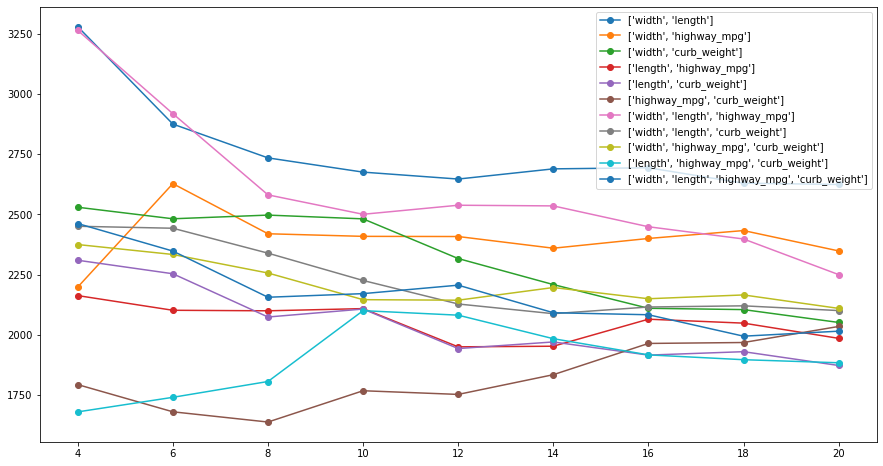

In [429]:
# fig=plt.figure(figsize=(12,8))
# ax=fig.add_subplot(111)
# #univariate_param_result["rmse"]
# ax.plot(list(range(5,25,5)),univariate_param_result[not_price],marker='o')
# ax.set_xticks([5,10,15,20])

# plt.show()
feature_set_rmse=pd.DataFrame(columns=["feature_set","k_4","k_6","k_8",
                                       "k_10","k_12","k_14","k_16","k_18","k_20"])
length=len(feature_set_rmse)
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111)

for i in range(5,len(output)):
    rmse_results=[]
    rmse_results.append(output[i])
    #parameter
    for each_val in range(4,22,2):
        features_rmse=knn_train_test(output[i],"price",cars,each_val)
        rmse_results.append(features_rmse)
        #parameter
    ax.plot(range(4,22,2),rmse_results[1:],marker='o')
    length=len(feature_set_rmse)
    feature_set_rmse.loc[length]=rmse_results
#ax.set_xticks([5,10,15,20])
ax.legend(output[5:])
plt.show()

In [430]:
#feature_set_rmse
def highlight_min(s):
    is_min = s<1800
    return ['background: lightgreen' if cell else '' 
            for cell in is_min]
idx=pd.IndexSlice
slice1=idx[:,"k_4":"k_20"]  
feature_set_rmse.style.apply(highlight_min,subset=slice1)

,feature_set,k_4,k_6,k_8,k_10,k_12,k_14,k_16,k_18,k_20
0,"['width', 'length']",3278.360000,2874.320000,2734.000000,2674.940000,2646.190000,2688.480000,2693.040000,2629.050000,2623.770000
1,"['width', 'highway_mpg']",2198.030000,2627.160000,2419.200000,2408.440000,2407.730000,2359.250000,2399.690000,2432.470000,2347.970000
2,"['width', 'curb_weight']",2529.220000,2481.360000,2496.640000,2481.050000,2316.350000,2208.380000,2109.990000,2104.550000,2051.230000
3,"['length', 'highway_mpg']",2162.680000,2101.740000,2099.550000,2108.660000,1950.040000,1952.620000,2064.720000,2048.390000,1985.270000
4,"['length', 'curb_weight']",2309.300000,2253.270000,2073.810000,2106.870000,1942.950000,1970.320000,1915.750000,1929.950000,1872.690000
5,"['highway_mpg', 'curb_weight']",1793.340000,1680.490000,1638.060000,1767.880000,1752.650000,1834.480000,1964.140000,1967.990000,2034.600000
6,"['width', 'length', 'highway_mpg']",3263.100000,2917.440000,2580.580000,2500.000000,2537.560000,2534.810000,2448.290000,2397.520000,2249.710000
7,"['width', 'length', 'curb_weight']",2450.290000,2442.110000,2338.720000,2225.350000,2127.830000,2087.590000,2115.300000,2120.200000,2100.510000
8,"['width', 'highway_mpg', 'curb_weight']",2374.470000,2333.280000,2256.350000,2145.740000,2143.570000,2196.170000,2149.570000,2165.380000,2109.540000
9,"['length', 'highway_mpg', 'curb_weight']",1680.160000,1740.620000,1806.220000,2100.170000,2081.420000,1983.840000,1916.640000,1896.650000,1883.940000


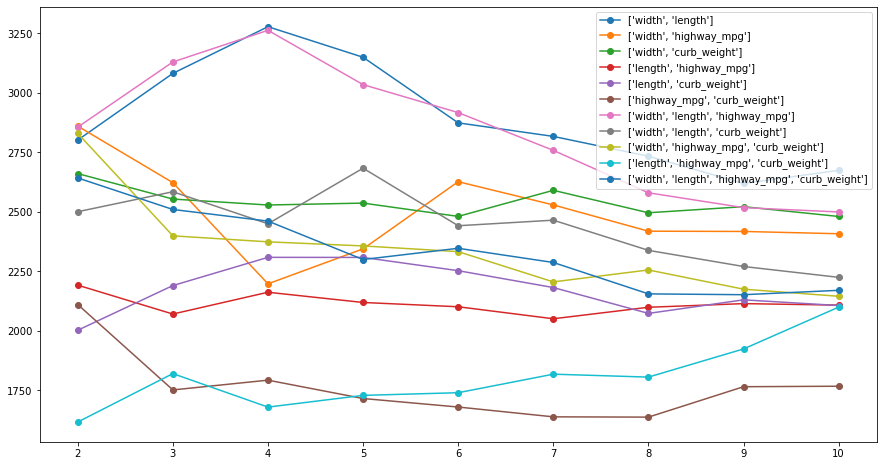

In [431]:
feature_set_rmse=pd.DataFrame(columns=["feature_set","k_2","k_3","k_4",
                                       "k_5","k_6","k_7","k_8","k_9","k_10"])
length=len(feature_set_rmse)
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111)

for i in range(5,len(output)):
    rmse_results=[]
    rmse_results.append(output[i])
    #parameter
    for each_val in range(2,11):
        features_rmse=knn_train_test(output[i],"price",cars,each_val)
        rmse_results.append(features_rmse)
        #parameter
    ax.plot(range(2,11),rmse_results[1:],marker='o')
    length=len(feature_set_rmse)
    feature_set_rmse.loc[length]=rmse_results
#ax.set_xticks([5,10,15,20])
ax.legend(output[5:])
plt.show()

In [432]:
#feature_set_rmse
def highlight_min(s):
    is_min = s<1800
    return ['background: lightgreen' if cell else '' 
            for cell in is_min]
idx=pd.IndexSlice
slice1=idx[:,"k_2":"k_10"]  
feature_set_rmse.style.apply(highlight_min,subset=slice1)

,feature_set,k_2,k_3,k_4,k_5,k_6,k_7,k_8,k_9,k_10
0,"['width', 'length']",2801.970000,3082.130000,3278.360000,3149.900000,2874.320000,2817.460000,2734.000000,2619.770000,2674.940000
1,"['width', 'highway_mpg']",2860.530000,2623.090000,2198.030000,2344.930000,2627.160000,2529.580000,2419.200000,2418.110000,2408.440000
2,"['width', 'curb_weight']",2661.270000,2554.230000,2529.220000,2537.230000,2481.360000,2590.900000,2496.640000,2522.180000,2481.050000
3,"['length', 'highway_mpg']",2192.520000,2071.180000,2162.680000,2119.740000,2101.740000,2051.310000,2099.550000,2114.940000,2108.660000
4,"['length', 'curb_weight']",2003.080000,2190.780000,2309.300000,2309.020000,2253.270000,2182.440000,2073.810000,2130.840000,2106.870000
5,"['highway_mpg', 'curb_weight']",2111.110000,1752.320000,1793.340000,1716.270000,1680.490000,1639.270000,1638.060000,1765.830000,1767.880000
6,"['width', 'length', 'highway_mpg']",2856.440000,3130.130000,3263.100000,3034.910000,2917.440000,2758.800000,2580.580000,2518.220000,2500.000000
7,"['width', 'length', 'curb_weight']",2501.030000,2584.970000,2450.290000,2683.890000,2442.110000,2465.440000,2338.720000,2270.900000,2225.350000
8,"['width', 'highway_mpg', 'curb_weight']",2829.990000,2399.750000,2374.470000,2357.340000,2333.280000,2206.220000,2256.350000,2175.580000,2145.740000
9,"['length', 'highway_mpg', 'curb_weight']",1617.450000,1820.910000,1680.160000,1729.490000,1740.620000,1818.510000,1806.220000,1924.470000,2100.170000


In [433]:
best_feature_set = [['highway_mpg', 'curb_weight'],
                    ['length', 'highway_mpg', 'curb_weight']]

In [134]:
# best_feature_set = [['highway_mpg', 'engine_size'],
#                     ['horsepower', 'city_mpg', 'engine_size'],
#                     ['highway_mpg', 'horsepower', 'city_mpg', 'engine_size']]

In [434]:
#multivariate
def knn_cross_validation(feature_cols,target_col,data,n=10,folds=4):
    kf=skmodelselection.KFold(n_splits=folds,shuffle=True,random_state=1)
    knn = skneighbors.KNeighborsRegressor(n_neighbors=n)
    rmse = skmodelselection.cross_val_score(estimator=knn,X=data[feature_cols],y=data[target_col],scoring='neg_root_mean_squared_error',cv=kf)
    #rmse = skmetrics.mean_squared_error(test_data[target_col],predictions)
    return np.round(np.abs(rmse),2)

In [436]:
feature_cols=['horsepower', 'curb_weight', 'width']
target_col='price'
data=cars
np.mean(knn_cross_validation(feature_cols,target_col,data))

2314.71

In [137]:
# ['fold','num_neighbors']+feature_cols

['fold', 'num_neighbors', 'horsepower', 'curb_weight', 'width']

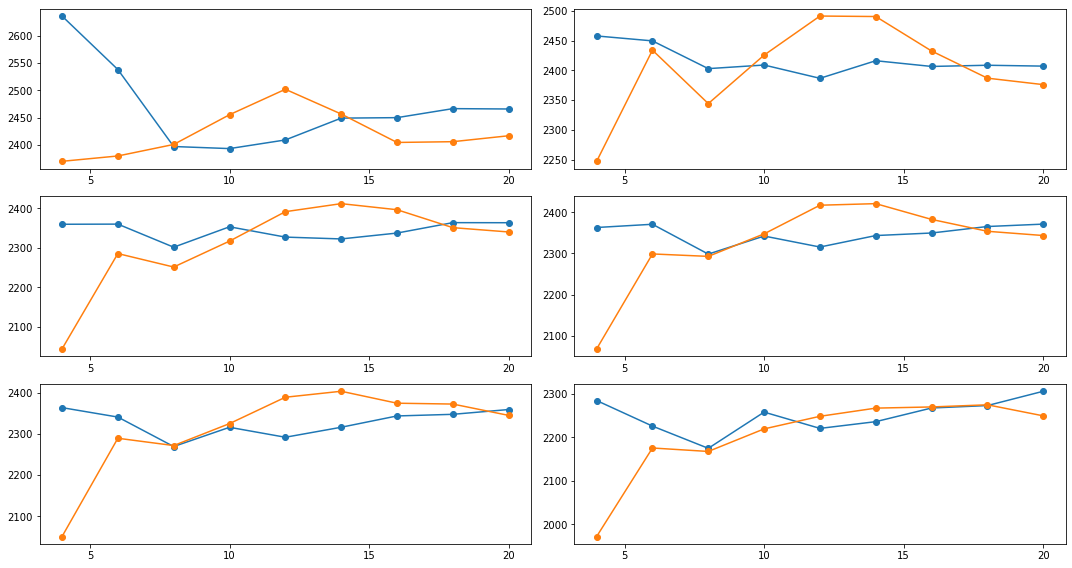

In [437]:
s=1
#rmse_with_folds = pd.DataFrame(columns=['fold','num_neighbors']+feature_cols)
#length=len(feature_set_rmse)
fig=plt.figure(figsize=(15,8))
for each_fold in range(4,28,4):
    plot_val=s
    ax=fig.add_subplot(3,2,plot_val)
    s+=1
    
    for i in range(len(best_feature_set)):
        rmse_results=[]
        for each_val in range(4,22,2):
            features_rmse=np.mean(knn_cross_validation(best_feature_set[i],"price",data,n=each_val,folds=each_fold))
            rmse_results.append(features_rmse)
        ax.plot(range(4,22,2),rmse_results,marker='o')
        ax.set_xticks([5,10,15,20])
        
    #length=len(feature_set_rmse)
    #feature_set_rmse.loc[length]=rmse_results

#plt.legend(output[5:])
plt.tight_layout()
plt.show()

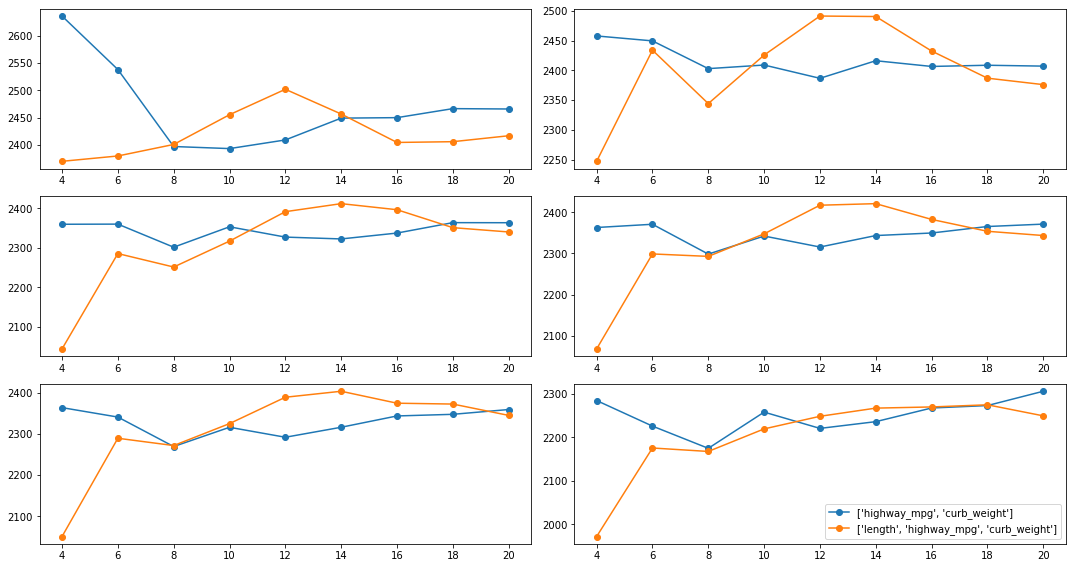

In [438]:
import warnings
warnings.filterwarnings('ignore')
rmse_with_folds = pd.DataFrame(columns=['best_features','fold','num_neighbors',"rmse"])
length=len(rmse_with_folds)
fig=plt.figure(figsize=(15,8))

for i in range(len(best_feature_set)):
    best_feature=[]
    best_feature.append(best_feature_set[i])
    for each_fold in range(4,28,4):
        plot_val=each_fold/4
        fold=[]
        fold.append(each_fold)
        ax=fig.add_subplot(3,2,int(plot_val))
        neighbor_results=[]
        
        for each_val in range(4,22,2):
            rmse_results=[]
            rmse_results.append(each_val)
            features_rmse=np.mean(knn_cross_validation(best_feature_set[i],"price",data,
                                                       n=each_val,folds=each_fold))
            neighbor_results.append(features_rmse)
            rmse_results.append(features_rmse)
            result=best_feature+fold+rmse_results
            length=len(rmse_with_folds)    
            rmse_with_folds.loc[length]=result
        #print(neighbor_results,result)
        ax.plot(range(4,22,2),neighbor_results,marker='o')
        #ax.set_xticks([5,10,15,20])
        
    #length=len(feature_set_rmse)
    #feature_set_rmse.loc[length]=rmse_results

plt.legend(best_feature_set)
plt.tight_layout()
plt.show()

In [439]:
rmse_with_folds['best_features']=rmse_with_folds['best_features'].apply(tuple)
filtered = rmse_with_folds[rmse_with_folds["rmse"]<3000].sort_values("rmse").head(20)
filtered.set_index(["best_features","fold","num_neighbors"],inplace=True)
filtered

rmse
best_features                      fold num_neighbors             
(length, highway_mpg, curb_weight) 24   4              1972.156667
                                   12   4              2043.765833
                                   20   4              2050.732000
                                   16   4              2068.960000
                                   24   8              2167.207083
(highway_mpg, curb_weight)         24   8              2174.374583
(length, highway_mpg, curb_weight) 24   6              2175.130417
                                        10             2218.910833
(highway_mpg, curb_weight)         24   12             2220.063333
                                        6              2225.323750
                                        14             2235.500833
(length, highway_mpg, curb_weight) 8    4              2247.146250
                                   24   12             2247.789167
                                        20             2248.820417
                                   12   8              2251.049167
(highway_mpg, curb_weight)         24   10             2257.369583
(length, highway_mpg, curb_weight) 24   14             2266.535000
(highway_mpg, curb_weight)         24   16             2266.821667
                                   20   8              2269.068500
(length, highway_mpg, curb_weight) 24   16             2269.224583

In [141]:
filtered = rmse_with_folds[rmse_with_folds["rmse"]<3000].sort_values("rmse").head(20)
filtered

,best_features,fold,num_neighbors,rmse
153,"(highway_mpg, horsepower, city_mpg, engine_size)",24,4,2574.168750
99,"(horsepower, city_mpg, engine_size)",24,4,2579.167083
90,"(horsepower, city_mpg, engine_size)",20,4,2594.879500
45,"(highway_mpg, engine_size)",24,4,2638.337500
144,"(highway_mpg, horsepower, city_mpg, engine_size)",20,4,2650.296500
100,"(horsepower, city_mpg, engine_size)",24,6,2653.777917
36,"(highway_mpg, engine_size)",20,4,2663.198000
81,"(horsepower, city_mpg, engine_size)",16,4,2676.893125
18,"(highway_mpg, engine_size)",12,4,2725.028333
154,"(highway_mpg, horsepower, city_mpg, engine_size)",24,6,2728.016667


In [142]:
filtered.set_index(["best_features","fold","num_neighbors"],inplace=True)

In [ ]:
filtered

In [115]:
multi=filtered.set_index(["best_features","fold","num_neighbors"])

In [112]:
rmse_with_folds.index.get_level_values("fold")

KeyError: 'Requested level (fold) does not match index name (None)'

In [101]:
rmse_with_folds.value_counts()

best_features                                     fold  num_neighbors  rmse       
(highway_mpg, engine_size)                        4     4              3077.712500    1
(horsepower, city_mpg, engine_size)               8     12             3573.538750    1
(highway_mpg, horsepower, city_mpg, engine_size)  24    12             3219.498750    1
                                                        14             3389.747500    1
                                                        16             3517.094583    1
                                                                                     ..
                                                  4     6              3256.920000    1
                                                        8              3482.812500    1
                                                        10             3786.805000    1
                                                        12             4020.695000    1
(horsepower, city_mpg, engine_size)  

In [119]:
multi[multi<3000].head(10)

rmse
best_features                                    fold num_neighbors             
(highway_mpg, horsepower, city_mpg, engine_size) 24   4              2574.168750
(horsepower, city_mpg, engine_size)              24   4              2579.167083
                                                 20   4              2594.879500
(highway_mpg, engine_size)                       24   4              2638.337500
(highway_mpg, horsepower, city_mpg, engine_size) 20   4              2650.296500
(horsepower, city_mpg, engine_size)              24   6              2653.777917
(highway_mpg, engine_size)                       20   4              2663.198000
(horsepower, city_mpg, engine_size)              16   4              2676.893125
(highway_mpg, engine_size)                       12   4              2725.028333
(highway_mpg, horsepower, city_mpg, engine_size) 24   6              2728.016667

In [104]:
df = pd.DataFrame({'a':[1,1,1,2,2,2,3,3,3], 
                       'b':[1,2,3,1,2,3,1,2,3], 
                       'c':range(9)})
filt = pd.Series({1:True, 2:False, 3:True})
filt
#df[filt[df['a']].values]

1     True
2    False
3     True
dtype: bool

In [329]:
cars.columns[2:]

Index(['width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'symboling_-1', 'symboling_-2', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'make_alfa-romero',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel_type_gas',
       'aspiration_turbo', 'num_doors_four', 'body_style_convertible',
       'body_style_hardtop', 'body_style_hatchback', 'body_style_sedan',
       'body_style_wagon', 'drive_wheels_4wd', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'engine_location_front', 'engine_type_dohc',
       'engine_type_l', 'engine_type_ohc', 'engine_type_ohcf',
  

In [330]:
continuous_data=cars.columns[0:13]
categorical_data=cars.columns[14:]
feature_set_rmse=pd.DataFrame(columns=['feature_set','rmse'])

continuous_data_mse,continuous_data_rmse=knn_train_test(continuous_data,"price",cars)

df_length=len(feature_set_rmse)
feature_set_rmse.loc[df_length]=["continuous_features",continuous_data_rmse]

df_length=len(feature_set_rmse)
feature_set_rmse.loc[df_length]=["categorical_features",categorical_data_rmse]

feature_set_rmse

,feature_set,rmse
0,continuous_features,3973.00
1,categorical_features,833.59


In [331]:
best_positive_corr_features=most_corr_features[most_corr_features.between(0,.999,inclusive='neither')].index
best_negative_corr_features=most_corr_features[most_corr_features.between(-1,0,inclusive='neither')].index

best_positive_corr_features_mse,best_positive_corr_features_rmse=knn_train_test(best_positive_corr_features,"price",cars)
df_length=len(feature_set_rmse)
feature_set_rmse.loc[df_length]=["best_positive_corr_features",best_positive_corr_features_rmse]

feature_set_rmse
# df_length=len(feature_set_rmse)
# feature_set_rmse.loc[df_length]=["continuous_features",continuous_data_rmse]

,feature_set,rmse
0,continuous_features,3973.00
1,categorical_features,833.59
2,best_positive_corr_features,4243.14


In [332]:
best_negative_corr_features_mse,best_negative_corr_features_rmse=knn_train_test(best_negative_corr_features,"price",cars)
df_length=len(feature_set_rmse)
feature_set_rmse.loc[df_length]=["best_negative_corr_features",best_negative_corr_features_rmse]

In [333]:
feature_set_rmse

,feature_set,rmse
0,continuous_features,3973.00
1,categorical_features,833.59
2,best_positive_corr_features,4243.14
3,best_negative_corr_features,3343.80


In [701]:
feature_set_rmse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature_set  18 non-null     object 
 1   rmse         18 non-null     float64
dtypes: float64(1), object(1)
memory usage: 432.0+ bytes


In [334]:
for i in range(1,len(mse_values)):
    num_features=i+1
    features=mse_values.sort_values("rmse")["col_name"][:num_features]
    
    features_mse,features_rmse=knn_train_test(features,"price",cars)
    df_length=len(feature_set_rmse)
    feature_set_rmse.loc[df_length]=["{}_best_features".format(num_features),features_rmse]
feature_set_rmse

,feature_set,rmse
0,continuous_features,3973.00
1,categorical_features,833.59
2,best_positive_corr_features,4243.14
3,best_negative_corr_features,3343.80
4,2_best_features,3538.67
5,3_best_features,3168.47
6,4_best_features,2883.65
7,5_best_features,3431.97
8,6_best_features,2894.74
9,7_best_features,3603.28


In [284]:
cars.columns

Index(['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size',
       'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price', 'symboling_-1', 'symboling_-2',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'fuel_type_gas', 'aspiration_turbo', 'num_doors_four',
       'body_style_convertible', 'body_style_hardtop', 'body_style_hatchback',
       'body_style_sedan', 'body_style_wagon', 'drive_wheels_4wd',
       'drive_wheels_fwd', 'drive_wheels_rwd', 'engine_location_front',
       'engine_type_dohc', 'engine_type_l', 'engine_type_ohc'

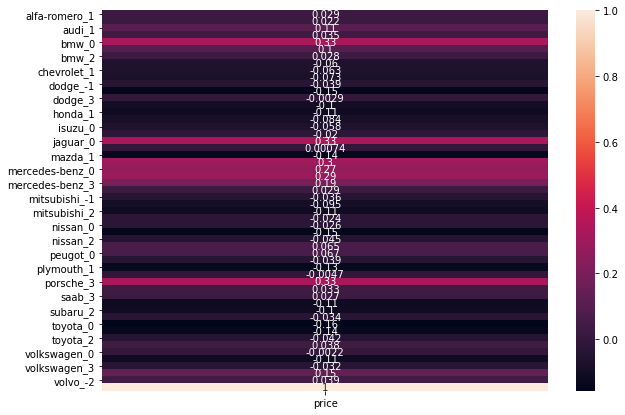

In [359]:
make_symboling=pd.get_dummies(cars_analysis["make"]+'_'+cars_analysis["symboling"].astype("str"))
make_symboling['price']=cars["price"]
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.heatmap(make_symboling.corr().loc[:,"price":"price"],annot=True)
plt.show()

In [335]:
cars.columns[:13]

Index(['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size',
       'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
       'city_mpg', 'highway_mpg'],
      dtype='object')

In [346]:
price_categorisation=cars[cars.columns[13:]].corr()["price"]
price_categorisation[price_categorisation.between(-0.99,-0.5,inclusive="both") | price_categorisation.between(0.5,0.99,inclusive="both")]

make_mercedes-benz    0.524817
drive_wheels_fwd     -0.603598
drive_wheels_rwd      0.647897
num_cylinders_four   -0.718585
fuel_system_2bbl     -0.510875
fuel_system_mpfi      0.525047
Name: price, dtype: float64

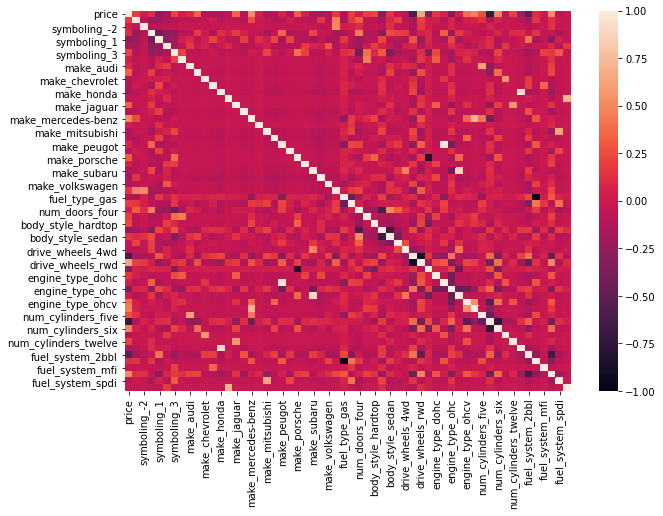

In [344]:
#cars[cars.columns[13:]].corr()
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.heatmap(cars[cars.columns[13:]].corr())
plt.show()

In [285]:
cars[continuous_data].columns

Index(['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size',
       'bore', 'stroke', 'compression_ratio', 'horsepower'],
      dtype='object')

In [286]:
cars[categorical_data].columns

Index(['highway_mpg', 'price', 'symboling_-1', 'symboling_-2', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'make_alfa-romero',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel_type_gas',
       'aspiration_turbo', 'num_doors_four', 'body_style_convertible',
       'body_style_hardtop', 'body_style_hatchback', 'body_style_sedan',
       'body_style_wagon', 'drive_wheels_4wd', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'engine_location_front', 'engine_type_dohc',
       'engine_type_l', 'engine_type_ohc', 'engine_type_ohcf',
       'engine_type_ohcv', 'num_cylinders_eight', 'num_cylinders_five',
       'num_cylinders_four', 'num_cylinders_six', 'num_cylinders_three

In [279]:
mse_values.sort_values("rmse")["col_name"][:4]

3    curb_weight
4    engine_size
8    highway_mpg
6     horsepower
Name: col_name, dtype: object

[Index](#Index)

# 6

## Title

instructions


[Index](#Index)

# 7

## Title

instructions


[Index](#Index)

# 8

## Title

instructions


[Index](#Index)

# 9

## Title

instructions


[Index](#Index)

# 10

## Title

instructions


[Index](#Index)

# 11

## Title

instructions


[Index](#Index)

# 12

## Title

instructions


[Index](#Index)

# 13

## Learning

- [Normalization or Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)
- [Difference between OnehotEncoder and get_dummies()](https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki)
- [Appending a list or series to a newly created dataframe on the go](https://www.kite.com/python/answers/how-to-append-a-list-as-a-row-to-a-pandas-dataframe-in-python)
- [Creating different combinations of list of elements](https://stackoverflow.com/questions/464864/how-to-get-all-possible-combinations-of-a-list-s-elements)
- [Explanation of sum of empty list](https://stackoverflow.com/questions/19453451/sum-of-nested-list-with-empty-list-explanation)
- [Understanding of Index Slice](https://stackoverflow.com/questions/44087637/pandas-how-does-indexslice-work/53069792)
- [Formating DataFrame slice using Index Slice](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Finer-Control-with-Slicing)
- [Styling for dataframes](https://www.geeksforgeeks.org/highlight-the-maximum-value-in-each-column-in-pandas/)
- [MultiIndexing in Pandas](https://stackoverflow.com/questions/25837440/pandas-boolean-indexing-with-multi-index)
- [More on multi-index](https://riptutorial.com/pandas/topic/3840/multiindex)
- [Accessing data in multiIndex](https://towardsdatascience.com/accessing-data-in-a-multiindex-dataframe-in-pandas-569e8767201d)
- [Removing Outliers](https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/)
- Ignore warnings: 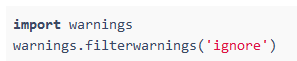

instructions


[Index](#Index)